<a href="https://colab.research.google.com/github/Shruti-Raj-Vansh-Singh/Deep-Learning/blob/master/CNN/digit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [0]:
dataset = load_digits()

In [3]:
dataset.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [4]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
dataset.data.shape

(1797, 64)

2


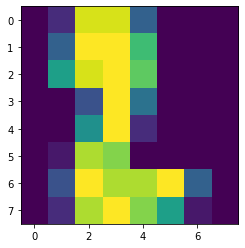

In [6]:
plt.imshow(dataset.images[243])
print(dataset.target[243])

Dividing the dataset into training and test dataset and normalizing the values of the pixels.

In [0]:
X = dataset.images
y = dataset.target
X = np.expand_dims(X, -1)

In [0]:
X = X/255 #normalizing the pixeel values

In [9]:
X.shape[1:]

(8, 8, 1)

In [10]:
X.astype(np.float32)

array([[[[0.        ],
         [0.00784314],
         [0.04313726],
         ...,
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.04313726],
         [0.05882353],
         ...,
         [0.02745098],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.02745098],
         [0.02352941],
         ...,
         [0.03137255],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.02745098],
         ...,
         [0.01176471],
         [0.01176471],
         [0.        ]],

        [[0.        ],
         [0.01176471],
         [0.05882353],
         ...,
         [0.05882353],
         [0.04313726],
         [0.        ]],

        [[0.        ],
         [0.00784314],
         [0.05098039],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.01176471],
         [0.06

Building the convolutional neural network for this dataset

In [0]:
def build_model():
  classifier = Sequential([
                         Conv2D(8, kernel_size=(3,3),padding='same',input_shape=X_train.shape[1:]),
                         Activation('relu'),
                         MaxPooling2D(pool_size=(2,2)),
                         BatchNormalization(),

                         Conv2D(16, kernel_size=(3,3),padding='same'),
                         Activation('relu'),
                         BatchNormalization(),
                         MaxPooling2D(pool_size=(2,2)),

                         #fully connected layer
                         Flatten(),
                         Dense(256),
                         Activation('relu'),
                
                         
                         Dense(10),
                         Activation('softmax')
  ])
  return classifier

In [12]:
score=[]
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X):
  model = build_model()
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
  X_train,X_test = X[train_index], X[test_index]
  y_train,y_test = y[train_index], y[test_index]
  model.fit(X_train,y_train, batch_size=7, epochs=100)
  acc = model.evaluate(X_test,y_test)
  score.append(acc)
  print(acc)

Epoch 1/100
231/231 [==============================] - 0s 2ms/step - loss: 0.5792 - sparse_categorical_accuracy: 0.8244
Epoch 2/100
231/231 [==============================] - 0s 2ms/step - loss: 0.1083 - sparse_categorical_accuracy: 0.9716
Epoch 3/100
231/231 [==============================] - 0s 2ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.9746
Epoch 4/100
231/231 [==============================] - 0s 2ms/step - loss: 0.0422 - sparse_categorical_accuracy: 0.9882
Epoch 5/100
231/231 [==============================] - 0s 2ms/step - loss: 0.0248 - sparse_categorical_accuracy: 0.9938
Epoch 6/100
231/231 [==============================] - 0s 2ms/step - loss: 0.0271 - sparse_categorical_accuracy: 0.9913
Epoch 7/100
231/231 [==============================] - 0s 2ms/step - loss: 0.0183 - sparse_categorical_accuracy: 0.9957
Epoch 8/100
231/231 [==============================] - 0s 2ms/step - loss: 0.0144 - sparse_categorical_accuracy: 0.9963
Epoch 9/100
231/231 [===================

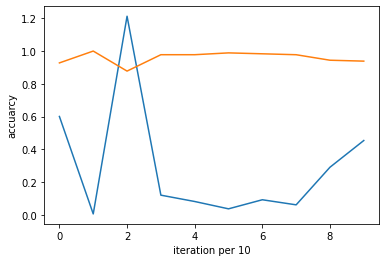

In [13]:
plt.plot(np.squeeze(score))
plt.ylabel('accuarcy')
plt.xlabel('iteration per 10')
plt.show()